In [10]:
%reset -f
import sys
sys.path.append("/home/jose/Documents/Maestria/Codigo/OTI/build/")
import pyoti.sparse as oti
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
""" Function f(x) and analytical derivatives """
def f(x):
    return x*np.cos(x) + np.sin(x)/x**2

In [12]:
""" Function f(x) and analytical derivatives OTI"""
def f_oti(x):
    return x*oti.cos(x) + oti.sin(x)/(x**2)

In [13]:
""" Analytical derivatives of f(x)"""
def diff(x):
    df = ((x**3 + x)*np.cos(x) - (x**4 + 2)*np.sin(x))/x**3
    #d2f = -((x**5 + 4*x)*np.cos(x) + (2*x**4 + x**2 - 6)*np.sin(x))/x**4
    #d3f = x*np.sin(x) - 3*np.cos(x) - np.cos(x)/x**2 + 6*np.sin(x)/x**3 + 18*np.cos(x)/x**4 - 24*np.sin(x)/x**5
    return df#, d2f, d3f


In [14]:
""" Derivatives of f(x) using centered finite differences """
def FD(x, h):
    df = (f(x + h) - f(x - h))/(2*h)
    #d2f = (f(x + h) - 2*f(x) + f(x - h))/h**2
    #d3f = ((f(x + 1.5*h) - f(x - 1.5*h)) - (3*f(x + 0.5*h) - 3*f(x - 0.5*h)))/h**3
    return df#, d2f, d3f

In [15]:
""" Derivatives of f(x) using Complex Taylor series expansion """
def CTSE(x,h):
    F = np.real(f(x + h*1j))
    df = np.imag(f(x + h*1j))/h
    #d2f = -2*(np.real(f(x + h*1j)) - f(x))/h**2
    #d3f = -6*(np.imag(f(x + h*1j)) - (np.imag(f(x + (1e-9)*1j))/(1e-9))*h)/h**3    
    return F, df#, d2f, d3f

In [16]:
def Dual(x):
    e1 = oti.e(1, order=1)
    x = x + e1
    F = f_oti(x).get_deriv(0)
    df = f_oti(x).get_deriv(1)
    return F, df

In [44]:
def plot(x,y,met, l='-'):
    plt.plot(x,y, l, label= met )
    plt.yscale('log')
    plt.xscale('log')
    plt.legend(loc="center right")
    plt.ylabel('Error relativo', fontsize=16)
    plt.xlabel(r'$h$', fontsize=16)
    plt.grid(True)

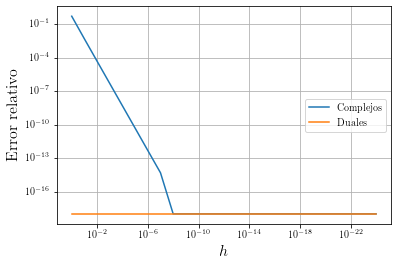

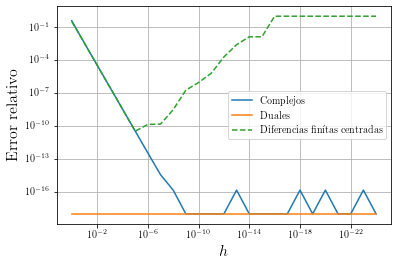

In [45]:
"""Plot error"""
x = 3
nevals = 25
eDF = np.zeros([nevals,2])
eCTSE = np.zeros([nevals,2])
eDual = np.zeros([nevals,2])
h = np.zeros(nevals)
    
for i in range(nevals):
    h[i] = 10**-i
    eDF[i,1] = (abs(diff(x) - FD(x, h[i]))/abs(diff(x)))
        
    eCTSE[i,0] = abs(f(x) - CTSE(x, h[i])[0]) / abs(f(x))+1e-18 # error f(x) with CTSE
    eCTSE[i,1] = (abs(diff(x) - CTSE(x, h[i])[1])/abs(diff(x)))+1e-18
        
    eDual[i,0] = abs(f(x) - Dual(x)[0]) / abs(f(x))+1e-18 # error f(x) with CTSE
    eDual[i,1] = (abs(diff(x) - Dual(x)[1])/abs(diff(x)))+1e-18

met = ('Complejos', 'Duales')

"""Plot error en F"""
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
mpl.rc('text', usetex=True) 
fig1 = plt.figure(1)
for i in met:
    if i=='Complejos':
        e=eCTSE
    else:
        e=eDual
    plot(h,e[:,0], i)
plt.gca().invert_xaxis()
plt.savefig("ErrorF_Comp_Dual.pdf")

met = ('Complejos', 'Duales', 'Diferencias finítas centradas')

"""Plot error en df"""
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
mpl.rc('text', usetex=True) 
fig2 = plt.figure(2)
for i in met:
    if i=='Complejos':
        e=eCTSE
        l='-'
    elif i=='Duales':
        e=eDual
    else:
        e=eDF
        l='--'
    plot(h,e[:,1], i, l)
plt.gca().invert_xaxis()
plt.savefig("Errordf_Comp_Dual.pdf")

In [28]:
eDF

array([[3.29476271e-01, 0.00000000e+00],
       [3.58367940e-03, 0.00000000e+00],
       [3.58664987e-05, 0.00000000e+00],
       [3.58667984e-07, 0.00000000e+00],
       [3.58467388e-09, 0.00000000e+00],
       [3.35354586e-11, 0.00000000e+00],
       [1.40185284e-10, 0.00000000e+00],
       [1.49349046e-10, 0.00000000e+00],
       [3.04469235e-09, 0.00000000e+00],
       [1.85152622e-07, 0.00000000e+00],
       [9.08988449e-07, 0.00000000e+00],
       [6.32936981e-06, 0.00000000e+00],
       [1.96344662e-04, 0.00000000e+00],
       [2.55423148e-03, 0.00000000e+00],
       [1.33701567e-02, 0.00000000e+00],
       [1.33701567e-02, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.000000